MovieWriter imagemagick unavailable; using Pillow instead.


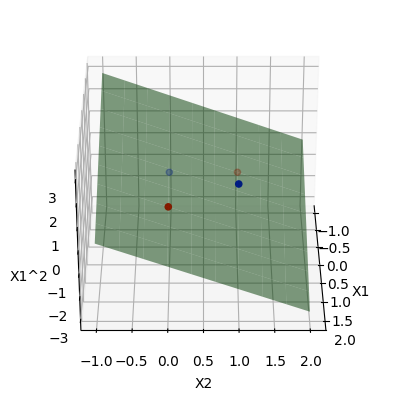

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

def plot_3d_transformed_data_with_plane_gif(transformed_data):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Separate points by class
    class1 = [(x1, x2, x1_sq) for x1, x2, x1_sq, label in transformed_data if label == 'Class 1']
    class2 = [(x1, x2, x1_sq) for x1, x2, x1_sq, label in transformed_data if label == 'Class 2']
    
    # Plot Class 1 points
    ax.scatter(
        [x[0] for x in class1],  # X1
        [x[1] for x in class1],  # X2
        [x[2] for x in class1],  # X1^2
        color='blue', label='Class 1'
    )
    
    # Plot Class 2 points
    ax.scatter(
        [x[0] for x in class2],  # X1
        [x[1] for x in class2],  # X2
        [x[2] for x in class2],  # X1^2
        color='red', label='Class 2'
    )
    
    # Create meshgrid for the plane
    x = np.linspace(-1, 2, 10)
    y = np.linspace(-1, 2, 10)
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y  # Equation of the plane X1 + X2 = 1
    
    # Plot the plane
    plane = ax.plot_surface(X, Y, Z, alpha=0.5, color='green')
    
    # Label the axes
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X1^2')
    
    # Function to update the view for rotation
    def rotate(angle):
        ax.view_init(azim=angle)

    # Create an animation
    ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)
    
    # Save as gif (requires imagemagick)
    ani.save('rotating_plot.gif', writer='imagemagick')

# Example usage with the transformed data
more_transformed = [
    (1, 1, 1, 'Class 1'),
    (0, 1, 0, 'Class 2'),
    (1, 0, 0, 'Class 2'),
    (0, 0, 0, 'Class 1')
]

plot_3d_transformed_data_with_plane_gif(more_transformed)